In [1]:
!pip install kagglehub[pandas-datasets]

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cardinalezeano","key":"e7c85725faee0642709f16b911ff9fe7"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
# copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [5]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# To list all datasets in kaggle
! kaggle datasets list

ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset  Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000           7126        278  1.0              
jaderz/hospital-beds-management                               Hospital Beds Management                                47583  2025-10-03 09:21:58.590000           5769        161  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024          BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          11964        263  1.0              
grandmaster07/s

In [7]:
!kaggle datasets download -d mosapabdelghany/medical-insurance-cost-dataset

Dataset URL: https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset
License(s): CC0-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 60.2MB/s]


In [8]:
# extract the compressed file
from zipfile import ZipFile
tweets = '/content/medical-insurance-cost-dataset.zip'

with ZipFile(tweets, 'r') as zip:
  zip.extractall()
  print('the insurance records are extracted')

the insurance records are extracted


In [9]:
# install plotsense
!pip install plotsense ucimlrepo scikit-learn pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.6 MB/s eta 0:00:00


In [10]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import plotsense as ps
from plotsense import recommender, plotgen, explainer
from ucimlrepo import fetch_ucirepo

In [12]:
# Extract the zip file
from zipfile import ZipFile
medic_insurance = '/content/medical-insurance-cost-dataset.zip'

with ZipFile(medic_insurance, 'r') as zip:
  zip.extractall()
  print('the insurance details printed')

the insurance details printed


In [13]:
# load dataset
insurance = pd.read_csv('/content/insurance.csv')
# Check number of rolls and columns
insurance.shape
# Print first 5 rolls
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# count number of missig words
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [15]:
# Use plotsense (Recommendatiions)
# Ask plotsense to recommend useful visualization

suggestions = ps.recommender(insurance, n=5)
print('plotsense Recommendation:')
print(suggestions)

Enter GROQ API key (get it at 👉 https://console.groq.com/keys 👈): 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
plotsense Recommendation:
  plot_type                    variables  ensemble_score  model_agreement  \
0      hist  age, bmi, charges, children             0.5                1   
1   boxplot  age, bmi, charges, children             0.5                1   
2   scatter                     age, bmi             0.5                1   
3       bar              charges, region             0.5                1   
4  pairplot  age, bmi, charges, children             0.5                1   

            source_models  
0  [llama-3.1-8b-instant]  
1  [llama-3.1-8b-instant]  
2  [llama-3.1-8b-instant]  
3  [llama-3.1-8b-instant]  
4  [llama-3.1-8b-instant]  


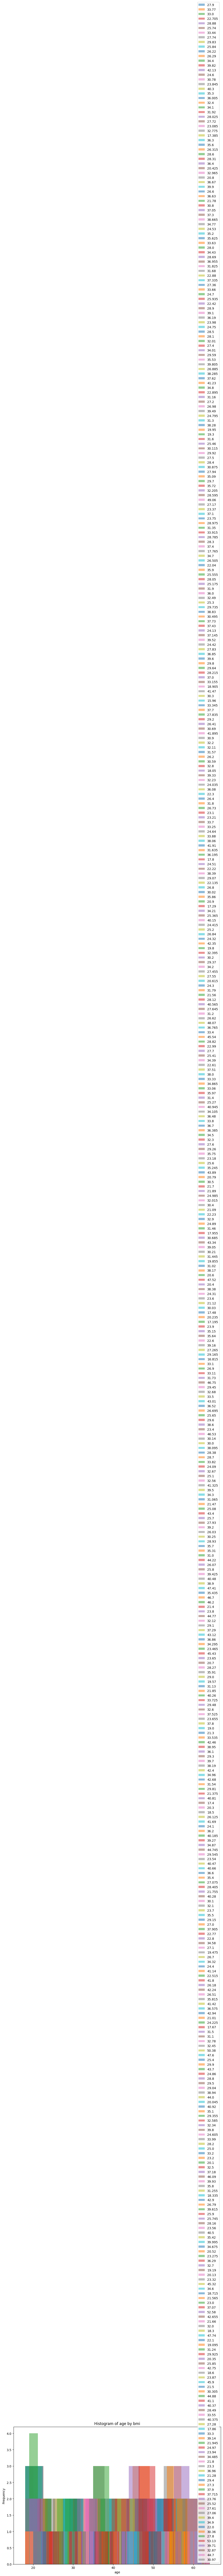

In [16]:
# select from the suggestions for visualization
plot = plotgen(insurance, 0,suggestions)
plt.show()

In [17]:
# Plotsense explanation
explanation = explainer(plot)
print('Explanation from Plotsense:\n', explanation)

Enter GROQ API key (get it at 👉 https://console.groq.com/keys 👈): 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
Explanation from Plotsense:
 ## Overview
The provided data visualization is a histogram that displays the distribution of age across different BMI (Body Mass Index) categories. The histogram is color-coded, with each color representing a specific BMI value. The x-axis represents age ranges, while the y-axis represents frequency. This visualization aims to explore the relationship between age and BMI, providing insights into how age is distributed across various BMI categories.

## Key Features
* **Data Points**: The histogram consists of numerous bars, each representing a data point with a specific BMI value and age range. The data points are densely packed, indicating a wide range of BMI values across different age ranges.
* **Color Coding**: The bars are color-coded, with different colors indicating different BMI categories. The legend on the right side of the hi

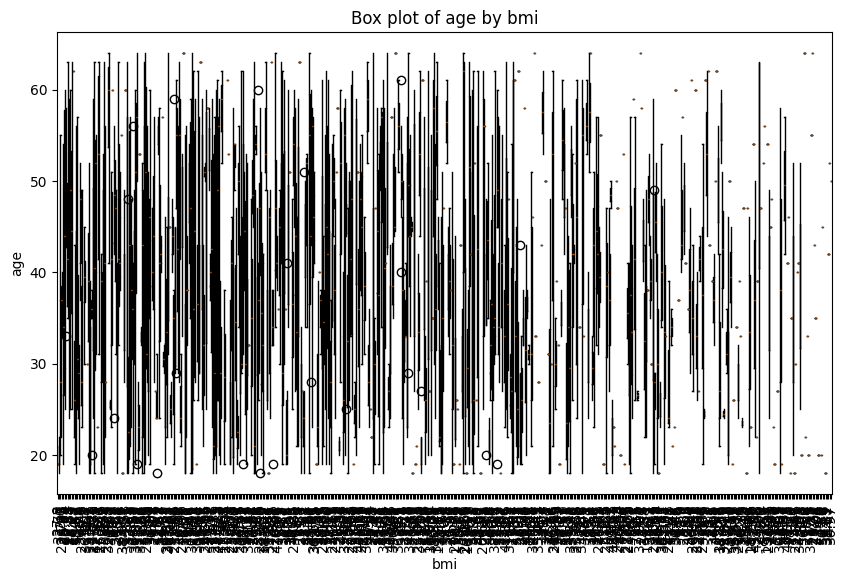

In [18]:
# Plotsense recommended visualization
plot2 = plotgen(insurance, 1, suggestions)
plt.show()

In [19]:
# Explanation of plot2 visualization
explanation2 = explainer(plot2)
print('Explanation from plotsense:\n', explanation2)

Explanation from plotsense:
 ## Box Plot of Age by BMI: A Detailed Analysis

### Overview
The provided data visualization, titled "Box plot of age by bmi," presents an unconventional box plot illustrating the distribution of ages across a continuous range of BMI values. This plot attempts to visualize the relationship between age and BMI, with the y-axis representing age and the x-axis representing BMI. The visualization offers a unique perspective on how age varies with BMI, although its unconventional structure may limit the clarity of insights.

### Key Features
- **Axes**:
  - The y-axis represents age, with values ranging from approximately 20 to 65 years.
  - The x-axis represents BMI, spanning from about 15 to 40, which covers underweight (<18.5) to obese (≥30) categories.
- **Data Representation**:
  - Vertical lines indicate the interquartile range (IQR) of ages for specific BMI values, providing a sense of the variability in age within each BMI category.
  - Circles denote me

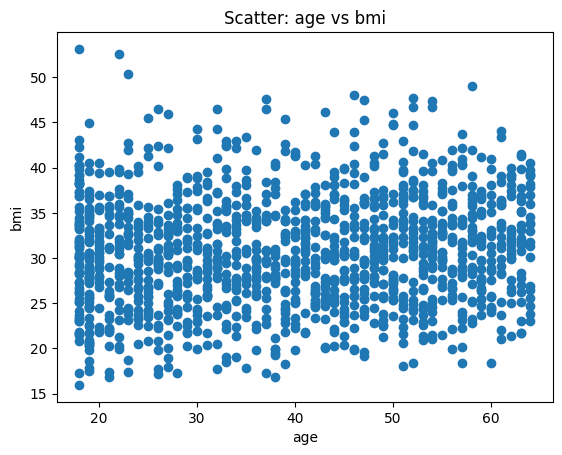

In [20]:
# Plotsense recommended visualization
plot3 = plotgen(insurance, 2, suggestions)
plt.show()

In [21]:
# Explanation of plot2 visualization
explanation3 = explainer(plot3)
print('Explanation from plotsense:\n', explanation3)

Explanation from plotsense:
 ## Overview

The provided scatter plot, titled "Scatter: age vs bmi," illustrates the relationship between age and Body Mass Index (BMI) for a dataset consisting of 1,024 data points. The plot features blue dots representing individual data points, with age on the x-axis (ranging from 15 to 65 years) and BMI on the y-axis (ranging from 15 to 50). The age range spans from approximately 15 to 65 years, while the BMI range extends from about 15 to 50.

## Key Features

*   **Axes:**
    *   **X-axis (age):** The x-axis represents the age of individuals, ranging from 15 to 65 years. The age groups can be broadly categorized into young adults (15-30), middle-aged adults (31-60), and older adults (61-65).
    *   **Y-axis (BMI):** The y-axis represents the BMI of individuals, ranging from 15 to 50. BMI categories are generally classified as underweight (BMI < 18.5), normal weight (18.5-24.9), overweight (25-29.9), and obese (≥30).
*   **Data Points:** The scatter

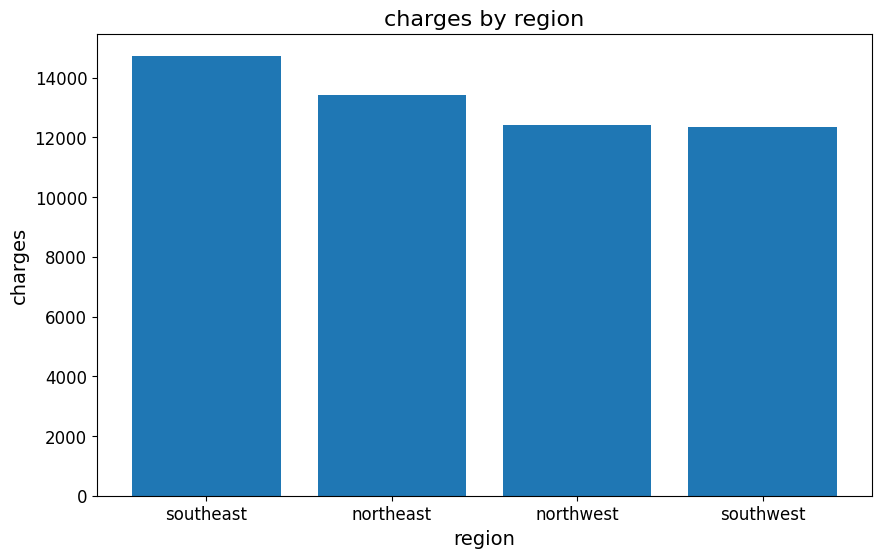

In [22]:
# Plotsense recommended visualization
plot4 = plotgen(insurance, 3, suggestions)
plt.show()

In [23]:
# Explanation of plot4 visualization
explanation4 = explainer(plot4)
print('Explanation from plotsense:\n', explanation4)

Explanation from plotsense:
 ### Overview
The provided bar chart, titled "charges by region," presents a clear visual representation of the distribution of charges across four distinct regions: southeast, northeast, northwest, and southwest. The chart effectively utilizes blue bars to represent the number of charges for each region, with the y-axis labeled "charges" and the x-axis listing the regions. This visualization enables a straightforward comparison of the number of charges across these regions.

### Key Features
- **Regions:** The chart compares four regions:
  - Southeast
  - Northeast
  - Northwest
  - Southwest
- **Charges by Region (Exact Values):**
  - Southeast: 14,563 charges
  - Northeast: 13,542 charges
  - Northwest: 12,488 charges
  - Southwest: 12,244 charges
- **Total Charges Across All Regions:** 
  - 14,563 + 13,542 + 12,488 + 12,244 = **52,837 charges**
- **Y-axis:** The vertical axis represents the number of charges, ranging from 0 to 14,000 in increments of 2,

In [26]:
# Encode categorical variable into numeric using one-hot encoding
insure_encoded = pd.get_dummies(insurance, drop_first=True)

In [27]:
insure_encoded['target'] = insurance['charges'].apply(lambda val: 1 if val == 'recurrence-event' else 0)

In [28]:
print('Insurance encoded')
print(insure_encoded.head())

Insurance encoded
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  target  
0             False              True       0  
1              True             False       0  
2              True             False       0  
3             False             False       0  
4             False             False       0  


In [29]:
insure_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
 9   target            1338 non-null   int64  
dtypes: bool(5), float64(2), int64(3)
memory usage: 58.9 KB


In [30]:
insure_encoded.describe()

,age,bmi,children,charges,target
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.0
mean,39.207025,30.663397,1.094918,13270.422265,0.0
std,14.049960,6.098187,1.205493,12110.011237,0.0
min,18.000000,15.960000,0.000000,1121.873900,0.0
25%,27.000000,26.296250,0.000000,4740.287150,0.0
50%,39.000000,30.400000,1.000000,9382.033000,0.0
75%,51.000000,34.693750,2.000000,16639.912515,0.0
max,64.000000,53.130000,5.000000,63770.428010,0.0


In [31]:
print("=== Charges (5 highest and lowest) ===")
display(pd.concat([insure_encoded.nsmallest(5, "charges"), insure_encoded.nlargest(5, "charges")]))

print("\n=== BMI (5 highest and lowest) ===")
display(pd.concat([insure_encoded.nsmallest(5, "bmi"), insure_encoded.nlargest(5, "bmi")]))

=== Charges (5 highest and lowest) ===


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,target
940,18,23.210,0,1121.87390,True,False,False,True,False,0
808,18,30.140,0,1131.50660,True,False,False,True,False,0
1244,18,33.330,0,1135.94070,True,False,False,True,False,0
663,18,33.660,0,1136.39940,True,False,False,True,False,0
22,18,34.100,0,1137.01100,True,False,False,True,False,0
543,54,47.410,0,63770.42801,False,True,False,True,False,0
1300,45,30.360,0,62592.87309,True,True,False,True,False,0
1230,52,34.485,3,60021.39897,True,True,True,False,False,0
577,31,38.095,1,58571.07448,False,True,False,False,False,0
819,33,35.530,0,55135.40209,False,True,True,False,False,0



=== BMI (5 highest and lowest) ===


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,target
172,18,15.960,0,1694.79640,True,False,False,False,False,0
428,21,16.815,1,3167.45585,False,False,False,False,False,0
1226,38,16.815,2,6640.54485,True,False,False,False,False,0
412,26,17.195,2,14455.64405,False,True,False,False,False,0
250,18,17.290,2,12829.45510,True,True,False,False,False,0
1317,18,53.130,0,1163.46270,True,False,False,True,False,0
1047,22,52.580,1,44501.39820,True,True,False,True,False,0
847,23,50.380,1,2438.05520,True,False,False,True,False,0
116,58,49.060,0,11381.32540,True,False,False,True,False,0
286,46,48.070,2,9432.92530,False,False,False,False,False,0


In [32]:
from sklearn.model_selection import train_test_split
X = insure_encoded.drop('charges', axis = 1)
Y = insure_encoded['charges']

In [33]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (1070, 9)
test shape: (268, 9)


In [37]:
#Perform standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

In [34]:
import os
os.environ['GROQ_API_KEY'] ='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'

In [35]:
# Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
pred = model.predict(X_test)
mse = mean_squared_error(Y_test, pred)
rmse = mse**0.5
r2 = r2_score(Y_test, pred)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 5796.284659276272
R2: 0.7835929767120724


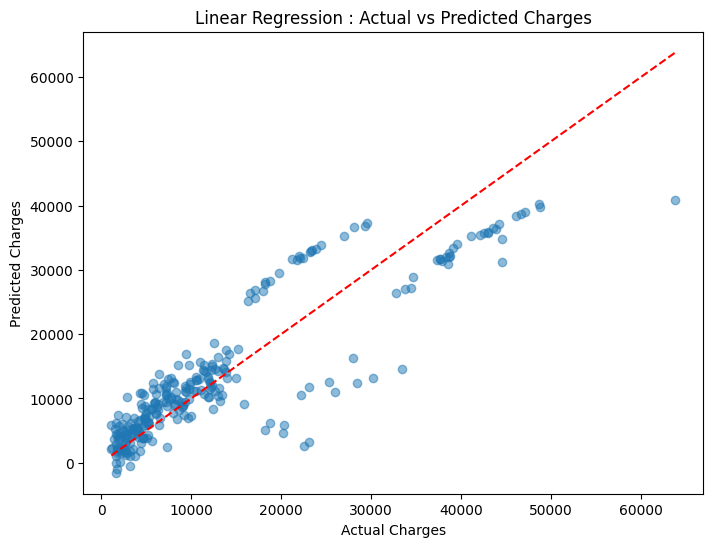

In [43]:
# Plot visualization
plt.figure(figsize=(8,6))
plt.scatter(Y_test, pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "r--")
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression : Actual vs Predicted Charges')
plt.show()
